# Pandas Practice Notebook 2

A second set of exercises to continue practicing **pandas**.
Tasks are different from the first notebook to give you more variety.

## Section 1: Indexing & Slicing
1. Create a `Series` with 10 numbers (1–10). Select only even numbers.
2. Create a `DataFrame` with 5 students: name, age, grade. Select only the names and grades.
3. From this DataFrame, select students with grade > 80.

In [1]:
import pandas as pd
import numpy as np

s = pd.Series(np.arange(1,11))
s.iloc[1::2]

data = {
    "name": ["Alice", "Bob", "Charlie", "Diana", "Ethan"],
    "age": [20, 22, 21, 23, 20],
    "grade": [70, 60, 81, 93, 79]
}
students = pd.DataFrame(data)
print(students)
students[['name', 'grade']]
students[students['grade'] > 80]

      name  age  grade
0    Alice   20     70
1      Bob   22     60
2  Charlie   21     81
3    Diana   23     93
4    Ethan   20     79


,name,age,grade
2,Charlie,21,81
3,Diana,23,93


## Section 2: DataFrame Operations
4. Create a `DataFrame` with 5 movies: title, genre, rating, year. Find the oldest movie.
5. Add a new column `decade` = year // 10 * 10.
6. Calculate the average rating per decade.

In [40]:
data = {
    "title": ["Inception", "The Matrix", "Interstellar", "The Godfather", "Parasite"],
    "genre": ["Sci-Fi", "Sci-Fi", "Sci-Fi", "Crime", "Thriller"],
    "rating": [8.8, 8.7, 8.6, 9.2, 8.6],
    "year": [2010, 1999, 2014, 1972, 2019]
}

movies = pd.DataFrame(data)
print(movies.iloc[movies['year'].idxmin()])
movies['decade'] = movies['year'] // 10 * 10
movies.groupby('decade')['rating'].mean()

title     The Godfather
genre             Crime
rating              9.2
year               1972
Name: 3, dtype: object


decade
1970    9.200000
1990    8.700000
2010    8.666667
Name: rating, dtype: float64

## Section 3: Merging & Joining
7. Create two `DataFrames`: one with employee info (id, name), another with salary info (id, salary). Merge them on `id`.
8. Create another `DataFrame` with department info (id, department). Merge all three together.
9. Find the department with the highest average salary.

In [2]:
import pandas as pd

employees = pd.DataFrame({
    "id": [1, 2, 3, 4, 5],
    "name": ["Alice", "Bob", "Charlie", "Diana", "Ethan"]
})

salaries = pd.DataFrame({
    "id": [1, 2, 3, 4, 5],
    "salary": [50000, 60000, 55000, 70000, 65000]
})

employees = employees.merge(salaries, on='id', how='inner')

departments = pd.DataFrame({
    "id": [1, 2, 3, 4, 5],
    "department": ["HR", "IT", "Finance", "Marketing", "Sales"]
})

employees = employees.merge(departments, on='id', how='inner')
employees.groupby('department')['salary'].mean().nlargest(1)

department
Marketing    70000.0
Name: salary, dtype: float64

## Section 4: Time Series
10. Create a date range of 30 days starting from Jan 1, 2023.
11. Create a `DataFrame` with daily sales (random numbers). Index = this date range.
12. Calculate total sales per week (resample by 'W').

In [3]:
import numpy as np

df = pd.DataFrame({
    'sales': np.random.default_rng(42).integers(100, 500, 30),
    'date': pd.date_range(start='2023-01-01', periods=30, freq='D')
})
df = df.set_index('date')
df.resample('W')['sales'].sum()

date
2023-01-01     135
2023-01-08    2273
2023-01-15    2301
2023-01-22    2133
2023-01-29    2419
2023-02-05     277
Freq: W-SUN, Name: sales, dtype: int64

## Section 5: Advanced Grouping
13. Load `sales.csv`. Group by both `Region` and `Product` to calculate total revenue.
14. Find the region with the highest overall revenue.
15. Create a new column `Profit` = `Revenue` - (`Quantity` * 5). Group by product and calculate average profit.

In [4]:
df = pd.read_csv('csv/sales.csv')

total_region = (
    df
    .groupby(['region', 'product'])['revenue']
    .sum()
)
print(total_region)
highest_region = (
    df
    .groupby(['region'])['revenue'].sum()
    .nlargest(1)
)
print(highest_region)
df['profit'] = df['revenue'] - (df['quantity'] * 5)
average_profit = (
    df
    .groupby('product')['profit']
    .mean()
)
print(average_profit)

region   product  
Central  Product A    2040.0
         Product B     450.0
         Product C    1317.0
         Product D    1489.0
         Product E    1377.0
East     Product A    1325.0
         Product B    2137.0
         Product C    1276.0
         Product D    2200.0
         Product E    3609.0
North    Product A    2525.0
         Product B    2788.0
         Product C    1343.0
         Product D    2064.0
         Product E    1853.0
South    Product A    1396.0
         Product B     606.0
         Product C     706.0
         Product D    1961.0
         Product E    2128.0
West     Product A    1964.0
         Product B    2768.0
         Product C    1845.0
         Product D    1414.0
         Product E    1612.0
Name: revenue, dtype: float64
region
North    10573.0
Name: revenue, dtype: float64
product
Product A    190.131579
Product B    168.512195
Product C    186.321429
Product D    149.272727
Product E    172.479167
Name: profit, dtype: float64


## Section 6: Visualization with Pandas
16. From `sales.csv`, plot a line chart of revenue over time.
17. Plot a bar chart of total revenue by region.
18. Plot a histogram of quantities sold.

          date   region    product  quantity  price  revenue
0   2023-02-08     East  Product D         3  64.33    193.0
1   2023-02-21     East  Product B        11  26.36    290.0
2   2023-01-29     West  Product A        11  18.55    204.0
3   2023-01-15    South  Product D        18  20.06    361.0
4   2023-02-12    South  Product E        15  13.60    204.0
..         ...      ...        ...       ...    ...      ...
195 2023-02-12    South  Product E        16   7.62    122.0
196 2023-01-29     East  Product B         8  18.62    149.0
197 2023-02-05    South  Product B         4  14.00     56.0
198 2023-01-13    North  Product B         8   1.25     10.0
199 2023-02-01  Central  Product E         4  24.75     99.0

[200 rows x 6 columns]


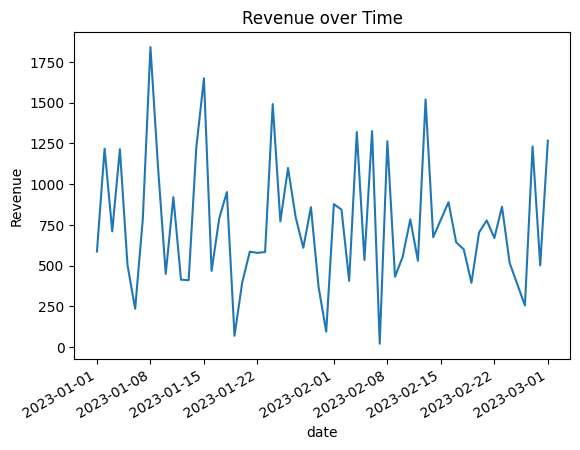

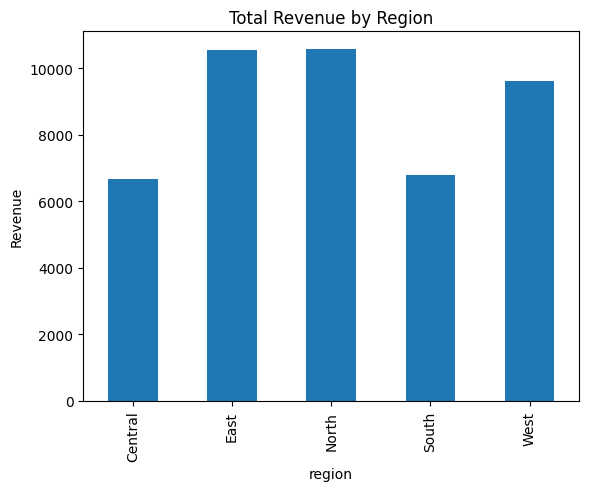

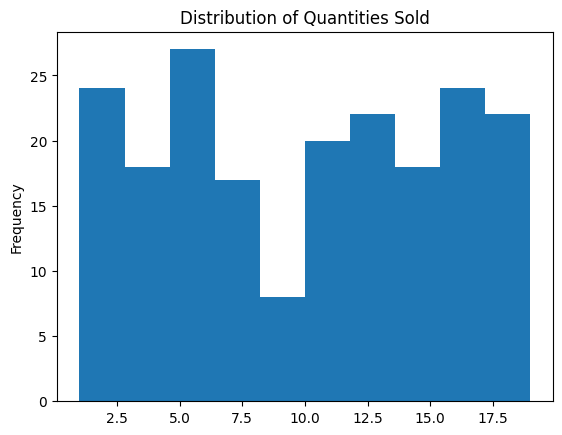

In [5]:
import matplotlib.pyplot as plt
df = pd.read_csv('csv/sales.csv', parse_dates=['date'])
print(df)
df.groupby('date')['revenue'].sum().plot(
    kind='line', title='Revenue over Time', ylabel='Revenue'
)
plt.show()
df.groupby('region')['revenue'].sum().plot(
    kind='bar', title='Total Revenue by Region', ylabel='Revenue'
)
plt.show()
df['quantity'].plot(
    kind='hist', bins=10, title='Distribution of Quantities Sold'
)
plt.show()

## Section 7: Portfolio Challenge
19. Write a function `sales_report(df)` that returns:
- total revenue
- average revenue per product
- best-selling product
20. Apply it to `sales.csv`.

In [6]:
def sales_report(df: str)->dict:
    df = pd.read_csv(df)
    return {
        'total revenue': df['revenue'].sum(),
        'average revenue by product': df.groupby('product')['revenue'].mean(),
        'best selling': df.groupby('product')['revenue'].sum().nlargest(1)
    }
sales_report('csv/sales.csv')

{'total revenue': np.float64(44193.0),
 'average revenue by product': product
 Product A    243.421053
 Product B    213.390244
 Product C    231.678571
 Product D    207.454545
 Product E    220.395833
 Name: revenue, dtype: float64,
 'best selling': product
 Product E    10579.0
 Name: revenue, dtype: float64}